In [109]:
import pandas as pd
import numpy as np

In [110]:
df=pd.read_csv("Drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [111]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [112]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [113]:
import seaborn as sns

<AxesSubplot: >

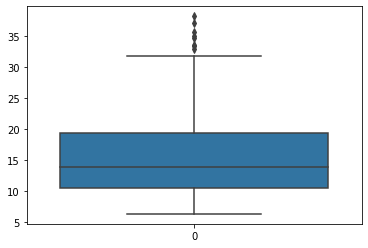

In [115]:
Na = df.iloc[:,4]
sns.boxplot(Na)

<AxesSubplot: >

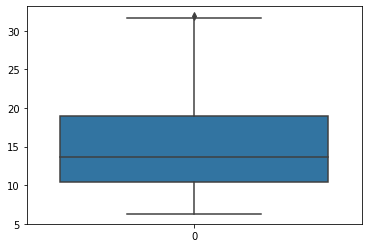

In [116]:
q1 = Na.quantile(.25)
q3 = Na.quantile(.75)

IQR = q3-q1

upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

df = df[df.Na_to_K<upper_limit]

sns.boxplot(df.Na_to_K)

In [117]:
sex=pd.get_dummies(df['Sex'])
sex

,F,M
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
195,1,0
196,0,1
197,0,1
198,0,1


In [118]:
df.insert(1,"Male",sex["M"])
df.insert(2,"Female",sex["F"])

In [120]:
df.drop("Sex", axis=1)

,Age,Male,Female,BP,Cholesterol,Na_to_K,Drug
0,23,0,1,HIGH,HIGH,25.355,DrugY
1,47,1,0,LOW,HIGH,13.093,drugC
2,47,1,0,LOW,HIGH,10.114,drugC
3,28,0,1,NORMAL,HIGH,7.798,drugX
4,61,0,1,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...,...
195,56,0,1,LOW,HIGH,11.567,drugC
196,16,1,0,LOW,HIGH,12.006,drugC
197,52,1,0,NORMAL,HIGH,9.894,drugX
198,23,1,0,NORMAL,NORMAL,14.020,drugX


In [122]:
BP=pd.get_dummies(df["BP"])
BP

,HIGH,LOW,NORMAL
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0
...,...,...,...
195,0,1,0
196,0,1,0
197,0,0,1
198,0,0,1


In [123]:
df.insert(3,"High",BP["HIGH"])
df.insert(4,"Low",BP["LOW"])
df.insert(5,"Normal",BP["NORMAL"])

In [129]:
df=df.drop("Sex",axis=1)

In [131]:
df

,Age,Male,Female,High,Low,Normal,Cholesterol,Na_to_K,Drug
0,23,0,1,1,0,0,HIGH,25.355,DrugY
1,47,1,0,0,1,0,HIGH,13.093,drugC
2,47,1,0,0,1,0,HIGH,10.114,drugC
3,28,0,1,0,0,1,HIGH,7.798,drugX
4,61,0,1,0,1,0,HIGH,18.043,DrugY
...,...,...,...,...,...,...,...,...,...
195,56,0,1,0,1,0,HIGH,11.567,drugC
196,16,1,0,0,1,0,HIGH,12.006,drugC
197,52,1,0,0,0,1,HIGH,9.894,drugX
198,23,1,0,0,0,1,NORMAL,14.020,drugX


In [133]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Cholesterol = le.fit_transform(df['Cholesterol'])

In [138]:
dfg = df
dfg=dfg.drop("Cholesterol", axis=1)

In [141]:
# dfg.insert(6,"Cholesterol", Cholesterol)
dfg

,Age,Male,Female,High,Low,Normal,Cholesterol,Na_to_K,Drug
0,23,0,1,1,0,0,0,25.355,DrugY
1,47,1,0,0,1,0,0,13.093,drugC
2,47,1,0,0,1,0,0,10.114,drugC
3,28,0,1,0,0,1,0,7.798,drugX
4,61,0,1,0,1,0,0,18.043,DrugY
...,...,...,...,...,...,...,...,...,...
195,56,0,1,0,1,0,0,11.567,drugC
196,16,1,0,0,1,0,0,12.006,drugC
197,52,1,0,0,0,1,0,9.894,drugX
198,23,1,0,0,0,1,1,14.020,drugX


In [143]:
# Spilitting of data
X = dfg.iloc[:, :-1]
X

,Age,Male,Female,High,Low,Normal,Cholesterol,Na_to_K
0,23,0,1,1,0,0,0,25.355
1,47,1,0,0,1,0,0,13.093
2,47,1,0,0,1,0,0,10.114
3,28,0,1,0,0,1,0,7.798
4,61,0,1,0,1,0,0,18.043
...,...,...,...,...,...,...,...,...
195,56,0,1,0,1,0,0,11.567
196,16,1,0,0,1,0,0,12.006
197,52,1,0,0,0,1,0,9.894
198,23,1,0,0,0,1,1,14.020


In [145]:
y=dfg.iloc[:,-1]

In [147]:
Y = pd.get_dummies(y)
Y

,DrugY,drugA,drugB,drugC,drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
...,...,...,...,...,...
195,0,0,0,1,0
196,0,0,0,1,0
197,0,0,0,0,1
198,0,0,0,0,1


In [151]:
#Train_Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.15, random_state=7)

In [152]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((163, 8), (29, 8), (163, 5), (29, 5))

In [162]:
#ANN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(8,input_dim=8, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(5, activation='softmax'))

In [163]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [164]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 64)                576       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2,893
Trainable params: 2,893
Non-trainable params: 0
_________________________________________________________________


In [167]:
model.fit(X_train,y_train,epochs=100,batch_size=5,validation_data=(X_test,y_test))

Epoch 1/100
33/33 [==============================] - 0s 3ms/step - loss: 0.4199 - accuracy: 0.8221 - val_loss: 0.3811 - val_accuracy: 0.8621
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 0.3615 - accuracy: 0.8466 - val_loss: 0.3712 - val_accuracy: 0.8276
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.8098 - val_loss: 0.4497 - val_accuracy: 0.7241
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8282 - val_loss: 0.3694 - val_accuracy: 0.8621
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3690 - accuracy: 0.8466 - val_loss: 0.4347 - val_accuracy: 0.7931
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8589 - val_loss: 0.5056 - val_accuracy: 0.7241
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.8344 - val_loss: 0.5583 - val_accuracy: 0.7931
Epoch 8/100
3

Epoch 59/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1780 - accuracy: 0.9264 - val_loss: 0.3120 - val_accuracy: 0.9310
Epoch 60/100
33/33 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9264 - val_loss: 0.2839 - val_accuracy: 0.8966
Epoch 61/100
33/33 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8650 - val_loss: 0.6075 - val_accuracy: 0.6897
Epoch 62/100
33/33 [==============================] - 0s 3ms/step - loss: 0.2905 - accuracy: 0.8957 - val_loss: 0.1858 - val_accuracy: 0.9655
Epoch 63/100
33/33 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9264 - val_loss: 0.3253 - val_accuracy: 0.8966
Epoch 64/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1619 - accuracy: 0.9509 - val_loss: 0.3491 - val_accuracy: 0.8276
Epoch 65/100
33/33 [==============================] - 0s 3ms/step - loss: 0.1553 - accuracy: 0.9571 - val_loss: 0.1950 - val_accuracy: 0.8966
Epoch 

In [168]:
model.predict([[47,1,0,0,1,0,0,10.114]])

1/1 [==============================] - 0s 108ms/step


array([[8.2336301e-03, 3.9628776e-05, 5.8695834e-02, 8.9524323e-01,
        3.7787829e-02]], dtype=float32)